In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Data visualization 
## Fundamentals and python tools

## what we will do:

+ Talk about _what makes_ a figure good in general.
+ Basic plot types, and how to represent types of data.
+ Plotting with Matplotlib, Seaborn and Pandas
+ Interactive plotting


<center><img src="hex_lion_alain_bengio.png" width=1200><center/>
G. Alain, Y. Bengio. _Understanding intermediate layers using linear classifier probes_. 2016

# 10 Rules for better figures
[source](http://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1003833&type=printable)

### 1. Know Your Audience

Is the figure for your exploratory data analysis?

or is it for a scientific publication?

### 2. Identify your message

How can the figure express the message you want to send to your audience 

### 3. Adapt the Figure to the Support Medium
High detail for screens or papers

Low detail, bigger annotations for presentation

### 4. Captions Are Not Optional
Always describe the figure

### 5. Do Not Trust the Defaults
[example](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
### 6. Use Color Effectively
We will talk about this later!

### 7. Do Not Mislead the Reader

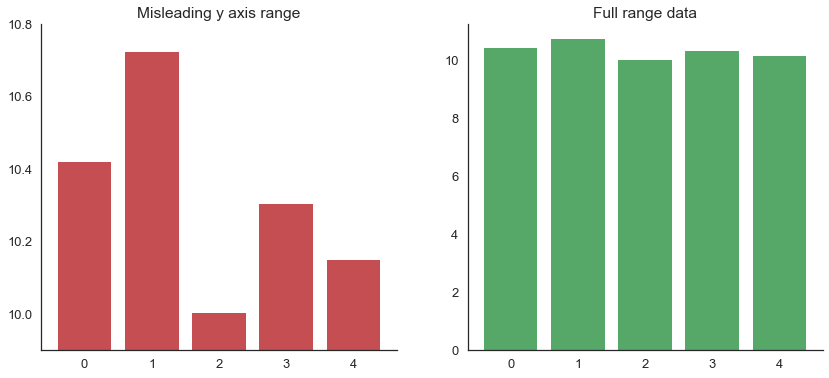

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "palettes")))
sns.set(context='talk', style='white',rc={"figure.figsize": (11, 8)})
np.random.seed(1)
data = np.random.rand(5)+10
x = np.arange(5)

fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121)
ax1.bar(x, data, color="C2")
ax1.set_ylim(9.9,10.8)
ax1.set_title('Misleading y axis range')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(122)

ax2.bar(x, data, color='C1')
ax2.set_title('Full range data')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

### 8. Avoid ‘‘Chartjunk’’

Avoid using to many colors

Visual elements that don't improve the message

### 9. Message Trumps Beauty
[see this](https://github.com/rougier/ten-rules/blob/master/figure-8.py)

### 10.  Get the Right Tool
Matplotlib, seaborn, R, **ggplot**, Bokeh, plotly, D3js...

But always use tools that generate reproducible figures.

# Choose the right color palette
Color maps are build sampling from the color space.

For quantitative data:
* The color map must be perceptually uniform (colors that represent low values must be percieved darker than the colors for higher values).
* The perceptual brightness of the color must increase in a continuous uniform way.

## Color palettes:

Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly.

### Qualitative color palettes
Distinguish discrete chunks of data that do not have an inherent ordering.

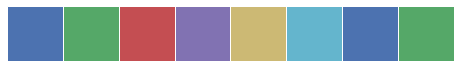

In [4]:
import seaborn as sns
sns.set(rc={"figure.figsize": (8, 8)})

current_palette = sns.color_palette(n_colors=8)
sns.palplot(current_palette)

Circular color space:

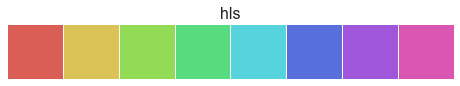

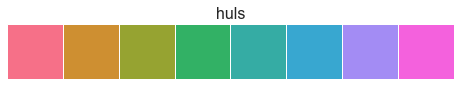

In [5]:
sns.palplot(sns.color_palette("hls", 8))
plt.title('hls', fontsize=16)
sns.palplot(sns.color_palette("husl", 8))
plt.title('huls', fontsize=16)
plt.show()

### Sequential color palettes

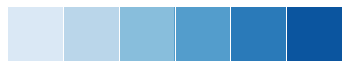

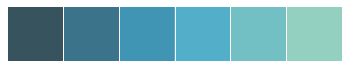

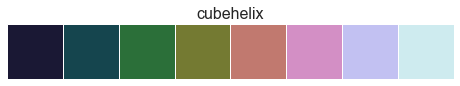

In [6]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("GnBu_d"))
sns.palplot(sns.color_palette("cubehelix", 8))
plt.title('cubehelix', fontsize=16)
plt.show()

#### Perceptually uniform sequential color maps

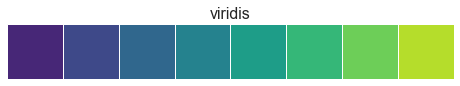

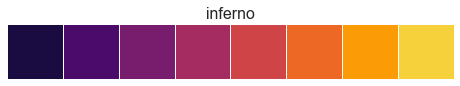

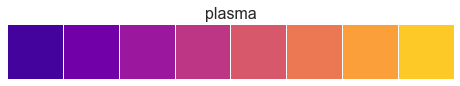

In [7]:
sns.palplot(sns.color_palette("viridis", 8))
plt.title('viridis', fontsize=16)
sns.palplot(sns.color_palette("inferno", 8))
plt.title('inferno', fontsize=16)
sns.palplot(sns.color_palette("plasma", 8))
plt.title('plasma', fontsize=16)
plt.show()

[Presentation at Scipy 2015](https://www.youtube.com/watch?v=xAoljeRJ3lU)

### Diverging color palettes

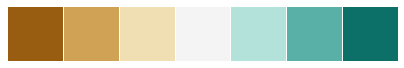

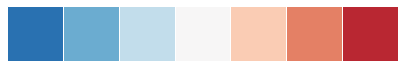

In [8]:
sns.palplot(sns.color_palette("BrBG", 7))
sns.palplot(sns.color_palette("RdBu_r", 7))

## The bad and ugly
for example, let's take a look at the following picture made with the color map **Jet**. 

How is the data represented in the following picture. Does it have any gaps? or is it smooth?

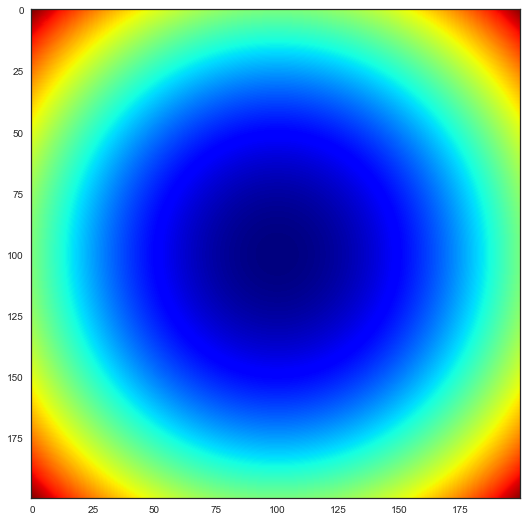

In [9]:
sns.set_style('white')

def smooth_circle(x, y):
    return (x**2+y**2)

# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

x = np.arange(-1, 1, dx)
y = np.arange(-1, 1, dy)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(9,9))
Z = smooth_circle(X, Y)
img = plt.imshow(Z, cmap=plt.cm.jet, interpolation='bilinear')
plt.show()

Let's look at an intersection:

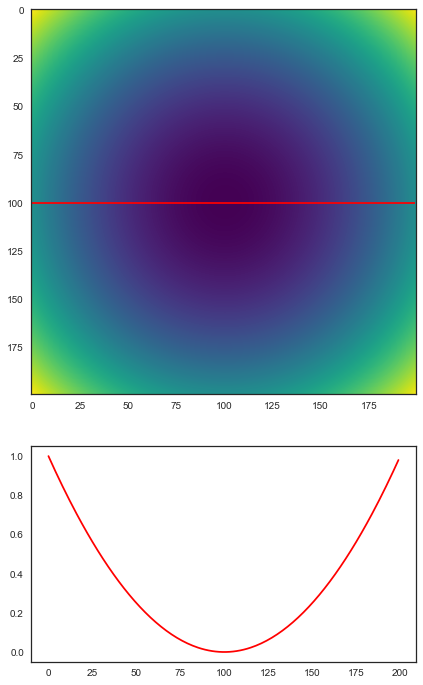

In [10]:
from matplotlib import gridspec
fig = plt.figure(figsize=(6, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.imshow(Z, cmap=plt.cm.viridis, interpolation='bilinear')
ax0.hlines(100,0,199, colors='red')
ax1 = plt.subplot(gs[1])
ax1.plot(Z[100,:], c='red')

plt.tight_layout()

### Find the gap!

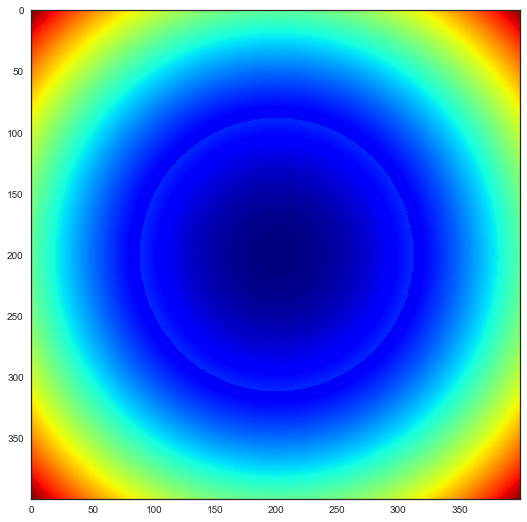

In [11]:
def gap_circle(x, y):
        z = x**2 + y**2
        z[z > 1.25] -= 0.5
        return z
    
# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

x = np.arange(-2, 2, dx)
y = np.arange(-2, 2, dy)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(9,9))
Z2 = gap_circle(X, Y)
img2 = plt.imshow(Z2, cmap=plt.cm.jet, interpolation='bilinear')
plt.show()

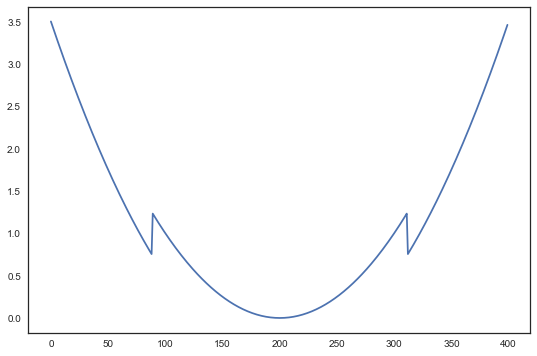

In [12]:
plt.figure(figsize=(9,6))
plt.plot(Z2[200,:])
plt.show()

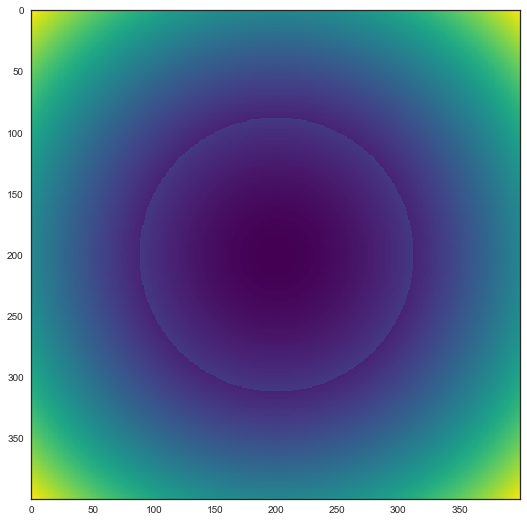

In [13]:
fig = plt.figure(figsize=(9,9))
img = plt.imshow(Z2, cmap=plt.cm.viridis)

# Fast tour: basic visualizations
More in [Python Graph Gallery](https://python-graph-gallery.com/)

## Lines
A line chart is used to visualize a trend in data over intervals of time or points that have some kind of order.

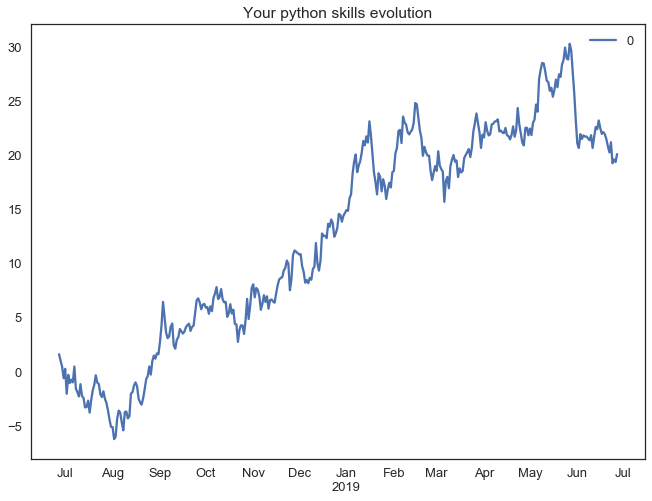

In [61]:
np.random.seed(1)
data = np.cumsum(np.random.randn(366))
dates = pd.date_range(start='27-6-2018', end='27-6-2019')
df = pd.DataFrame(data, dates)
df.plot(title='Your python skills evolution');

Or filled with area:

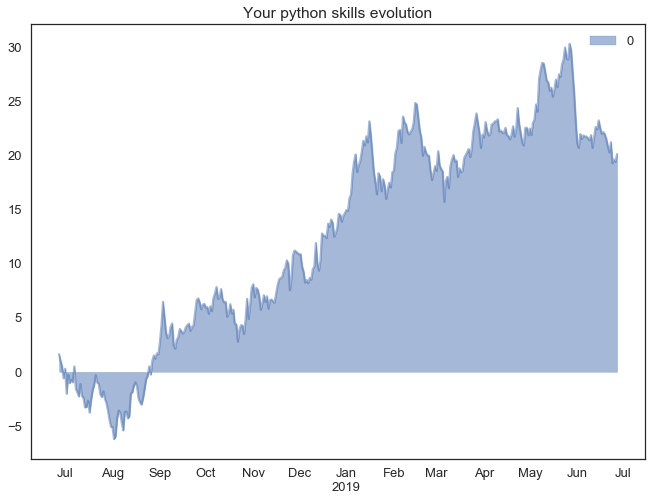

In [60]:
df.plot.area(title='Your python skills evolution', stacked=False);

## Scatter
Used when we want to show relationship between two variables (correlation). Scatters are usefull and can encode up to 4 features.

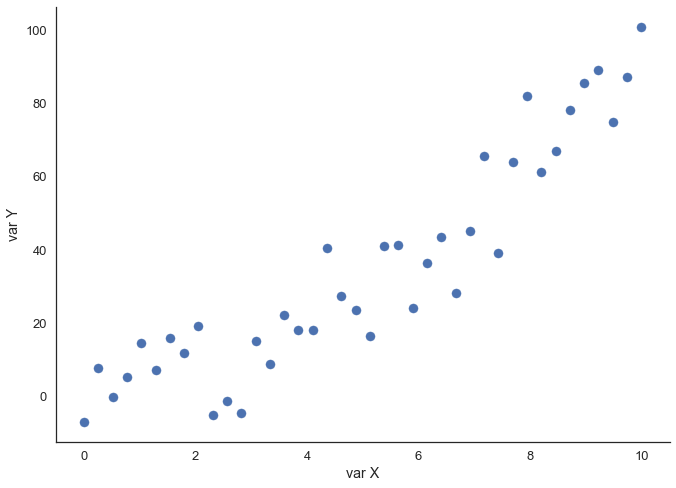

In [14]:
import seaborn as sns
sns.set(context='talk', style='white',rc={"figure.figsize": (11, 8)})

# random seed to obtain the same random numbers
np.random.seed(13)

# generate som random data
x = np.linspace(0,10,40) # 40 vals betw 0-10
y = x**2 + np.random.randn(40)*10  # f(X) = X² + noise

# init the figure with object oriented interface
fig, ax = plt.subplots()

# delete the top and righ axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# The plot.
ax.scatter(x,y)

# set axis labels
ax.set_xlabel('var X')
ax.set_ylabel('var Y')
plt.show()

We can add more visual attributes to the scatter plot to represent more dimensions (aka bubble chart): 

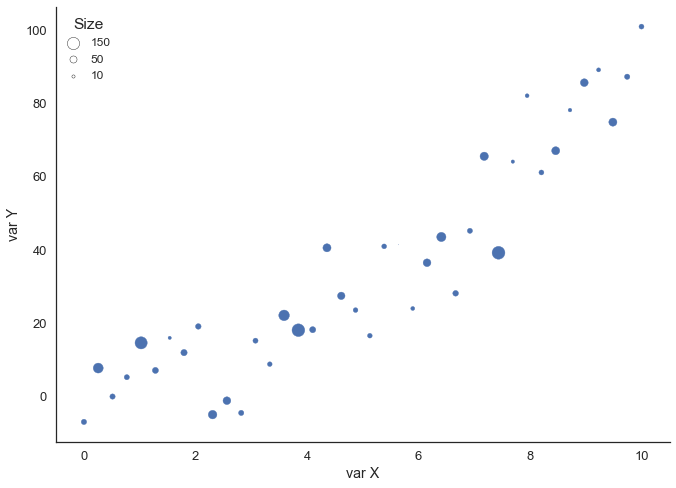

In [15]:
np.random.seed(13)

x = np.linspace(0,10,40)
y = x**2 + np.random.randn(40)*10
# extra variable: size! (more random noise)
s = (np.random.randn(40)+2)**2*10

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(x,y, s=s)
ax.set_xlabel('var X')
ax.set_ylabel('var Y')

# -----------------
# Point size legend
# -----------------
# Define 3 dummy points ([],[]: not ploted)
l1 = plt.scatter([],[], s=150,c='w', edgecolors='k')
l2 = plt.scatter([],[], s=50,c='w', edgecolors='k')
l3 = plt.scatter([],[], s=10,c='w', edgecolors='k')
labels = [150, 50, 10]

leg = plt.legend([l1, l2, l3], labels, ncol=1,
                 frameon=False, fontsize=12,
                 handlelength=1, loc = 0,
                 handletextpad=1, title='Size', scatterpoints = 1)

plt.show()

an even more with color:

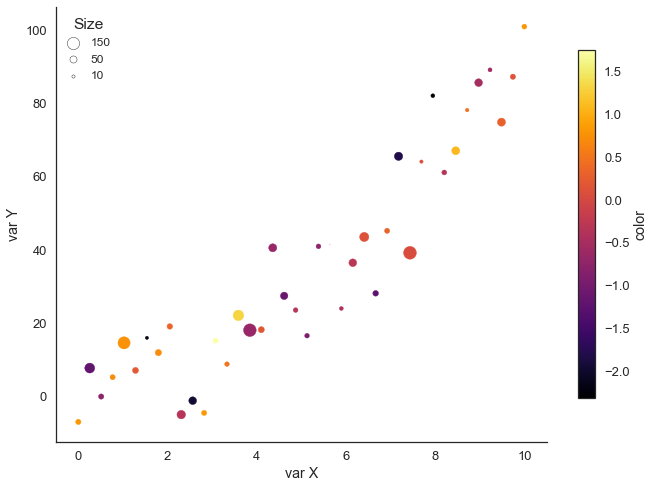

In [16]:
np.random.seed(13)

x = np.linspace(0,10,40)
y = x**2 + np.random.randn(40)*10
s = (np.random.randn(40)+2)**2*10
c = np.random.randn(40)

fig, ax = plt.subplots()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('var X')
ax.set_ylabel('var Y')
p = ax.scatter(x,y, s=s, c=c, cmap='inferno')

# colorbar:

c = plt.colorbar(p, shrink = 0.8)
c.set_label("color")


# Point size legend:
# define 3 dummy points ([],[]: not ploted)

l1 = plt.scatter([],[], s=150,c='w', edgecolors='k')
l2 = plt.scatter([],[], s=50,c='w', edgecolors='k')
l3 = plt.scatter([],[], s=10,c='w', edgecolors='k')
labels = [150, 50, 10]

leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=12,
                 handlelength=1, loc = 0, handletextpad=1,
                 title='Size', scatterpoints = 1)

plt.show(p)

### Or compare the distribution of different classes

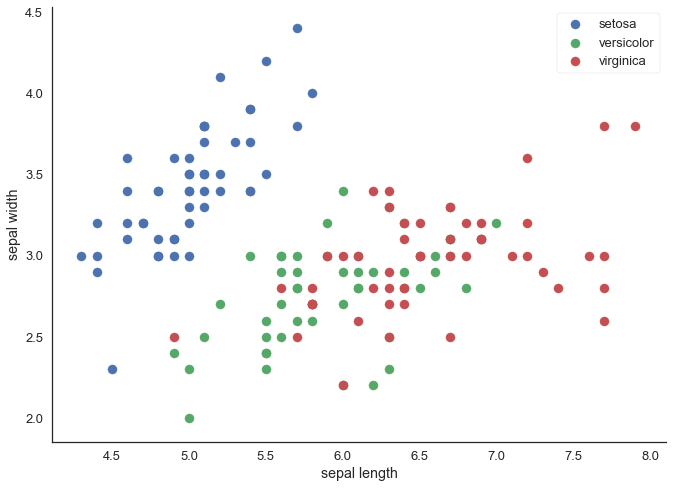

In [17]:
iris = sns.load_dataset('iris')
fig, ax = plt.subplots()

# iterate over species and filter the data
for sp in iris.species.unique():
    x = iris[iris.species==sp]['sepal_length']
    y = iris[iris.species==sp]['sepal_width']
    ax.scatter(x, y, label=sp)

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc=0, frameon=True)

## Bar plots

It shows the relationship between a numerical variable and a categorical variable. 

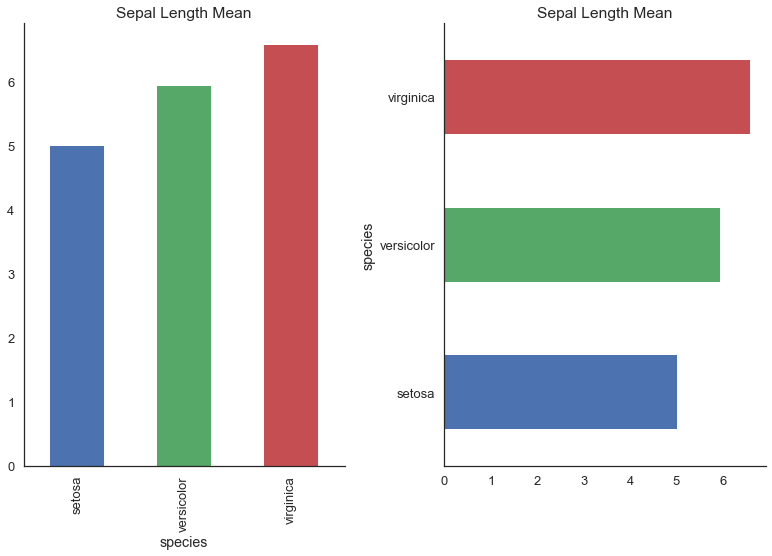

In [18]:
fig, ax = plt.subplots(1,2)
iris.groupby('species')['sepal_length'].mean().plot.bar(title='Sepal Length Mean', ax=ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
iris.groupby('species')['sepal_length'].mean().plot.barh(title='Sepal Length Mean', ax=ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.tight_layout()

#### Multi-set Bar Chart:
It displays a numerical value for several entities, organized into groups and subgroups.

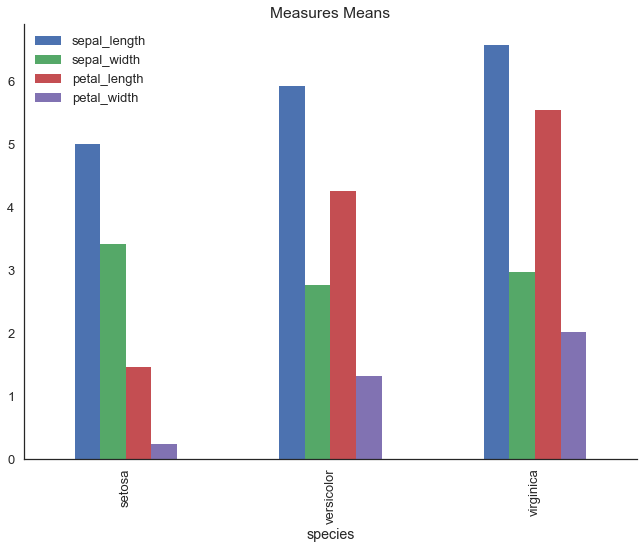

In [19]:
fig, ax = plt.subplots()
iris.groupby('species').mean().plot.bar(title='Measures Means', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Stacked bars:

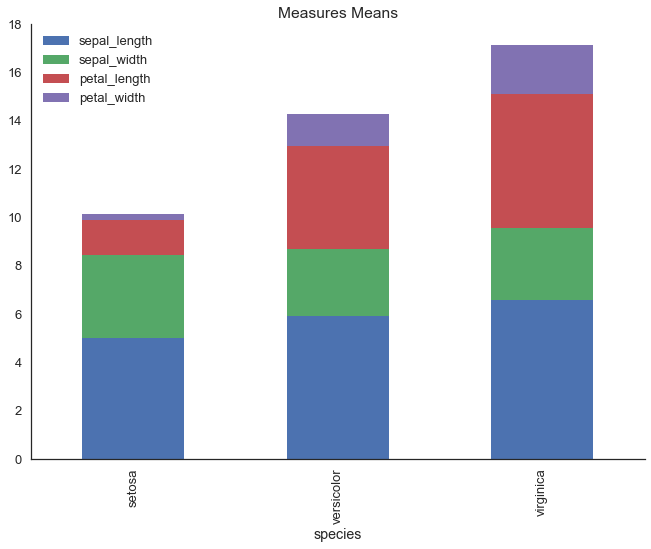

In [20]:
fig, ax = plt.subplots()
iris.groupby('species').mean().plot.bar(stacked=True, title='Measures Means', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Distribution

Used to visualize or get insights of the underlying distribution of the data.

### Histogram 
An histogram is an *accurate* graphical representation of the distribution of numerical data.

But you have to be carefull with the number of bins.

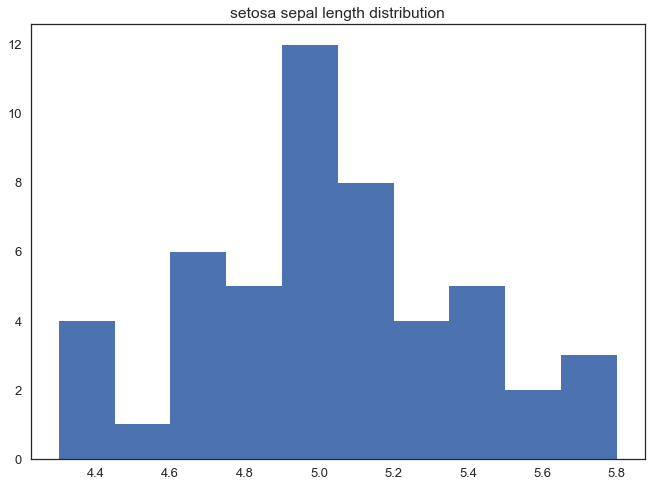

In [21]:
var_setosa_sepl = iris.loc[iris.species=='setosa','sepal_length']
plt.hist(var_setosa_sepl, bins=10);
plt.title('setosa sepal length distribution')
plt.show()

### Density plot
Shows the distribution (pmf) of a numerical variable. 

The distribution is aproximated with the **KDE** (Kernel Density Stimation) algorithm. 

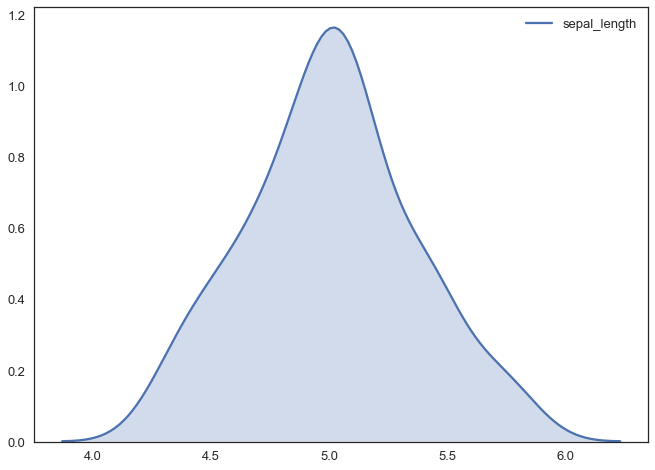

In [22]:
sns.kdeplot(var_setosa_sepl, shade=True)
plt.show()

Text(0.5,1,'sepal length distribution')

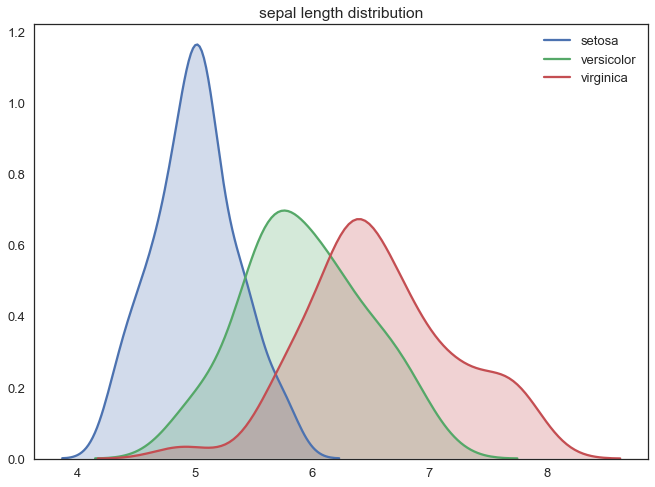

In [23]:
# plot of 2 variables
setosa = iris.loc[iris.species=='setosa','sepal_length'].values
versicolor = iris.loc[iris.species=='versicolor','sepal_length'].values
virginica = iris.loc[iris.species=='virginica','sepal_length'].values

p1=sns.kdeplot(setosa, shade=True, color="C0", label='setosa')
p1=sns.kdeplot(versicolor, shade=True, color="C1", label='versicolor')
p1=sns.kdeplot(virginica, shade=True, color="C2", label='virginica')
p1.set_title('sepal length distribution')

### Boxplot
Gives a "nice summary" of one or several numeric variables

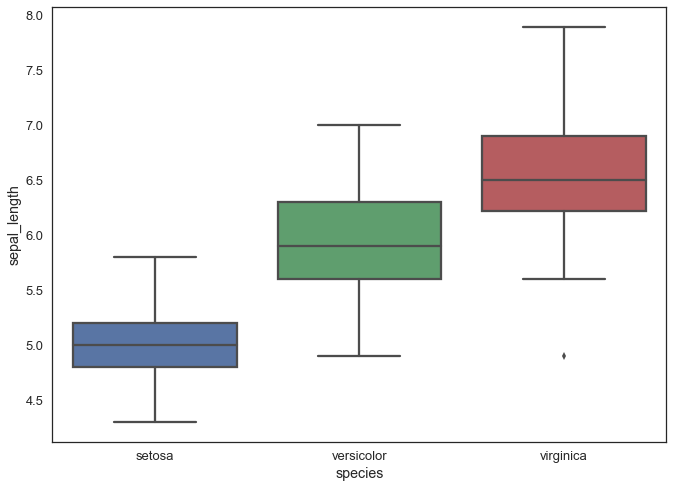

In [24]:
sns.boxplot(x='species', y='sepal_length', data=iris)

*DANGER! Box plots hide the underlying distribution and the number of values!*
![boxpl](https://d2f99xq7vri1nk.cloudfront.net/boxplots.gif)

> [J. Matejka, G. Fitzmaurice. Autodesk research](https://www.autodeskresearch.com/publications/samestats)

To solve this issues we can:
+ add jitter to have a sense of the distribution.

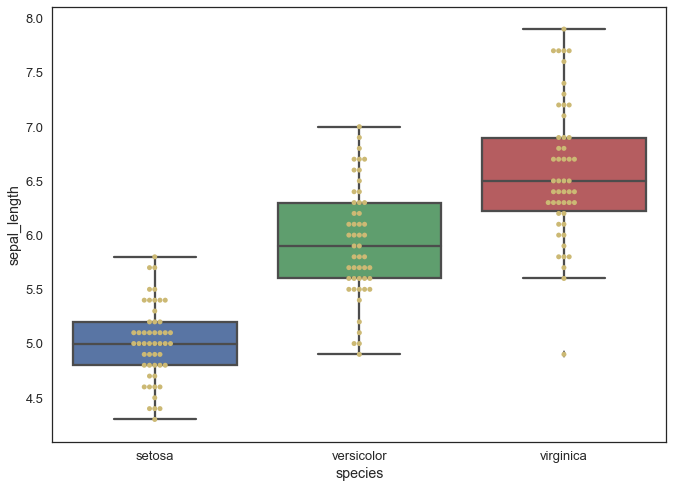

In [25]:
# Usual boxplot
ax = sns.boxplot(x='species', y='sepal_length', data=iris)
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='species', y='sepal_length', data=iris, color="C4")

or use:

### Violin Plots
![boxploviol](https://d2f99xq7vri1nk.cloudfront.net/BoxViolinSmaller.gif)

> [J. Matejka, G. Fitzmaurice. Autodesk research](https://www.autodeskresearch.com/publications/samestats)

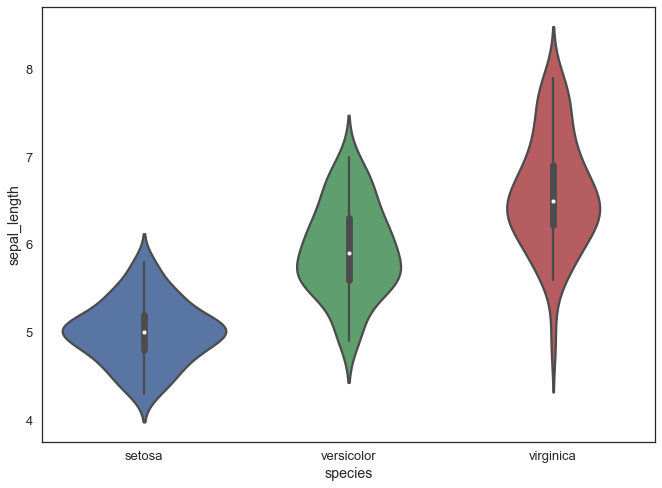

In [26]:
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.show()

Box plots are like visual summary statistics. 

In [27]:
df = pd.read_csv('datasets/DatasaurusDozen.tsv', sep='\t')

In [28]:
dset1 = df[df.dataset=='dino']
dset2 = df[df.dataset=='star']

In [29]:
print('Dataset 1 stats:\n---------------\n'
     f'X, Y mean: {dset1.x.mean():.5}, {dset1.y.mean():.5}\n'
     f'X, Y std:  {dset1.x.std():.5}, {dset1.y.std():.5} \n'
     f'correlation: {dset1.x.corr(dset1.y):.5}')

Dataset 1 stats:
---------------
X, Y mean: 54.263, 47.832
X, Y std:  16.765, 26.935 
correlation: -0.064472


In [30]:
print('Dataset 2 stats:\n---------------\n'
     f'X, Y mean: {dset2.x.mean():.5}, {dset2.y.mean():.5}\n'
     f'X, Y std:  {dset2.x.std():.5}, {dset2.y.std():.5} \n'
     f'correlation: {dset2.x.corr(dset2.y):.5}')

Dataset 2 stats:
---------------
X, Y mean: 54.267, 47.84
X, Y std:  16.769, 26.93 
correlation: -0.062961


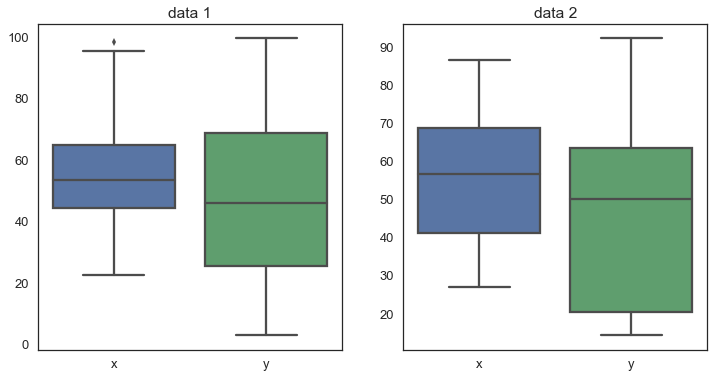

In [31]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(data=dset1, ax=ax[0])
ax[0].set_title('data 1')
sns.boxplot(data=dset2, ax=ax[1])
ax[1].set_title('data 2')
plt.show()

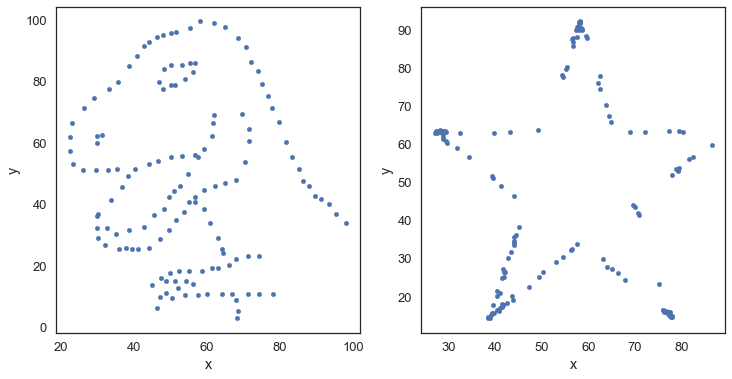

In [32]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
dset1.plot.scatter('x', 'y', ax=ax[0])
dset2.plot.scatter('x', 'y', ax=ax[1])
plt.show()

## 2D density plots
Visualize bivariate distributions.

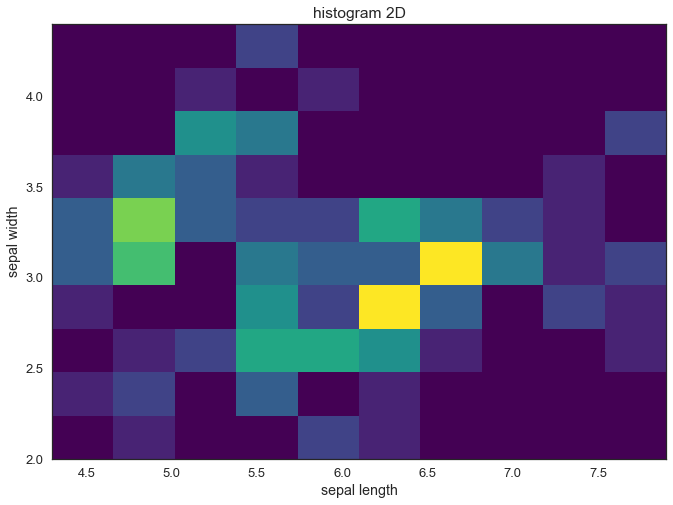

In [86]:
plt.hist2d(iris.sepal_length, iris.sepal_width, bins=10, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('histogram 2D')
plt.show()

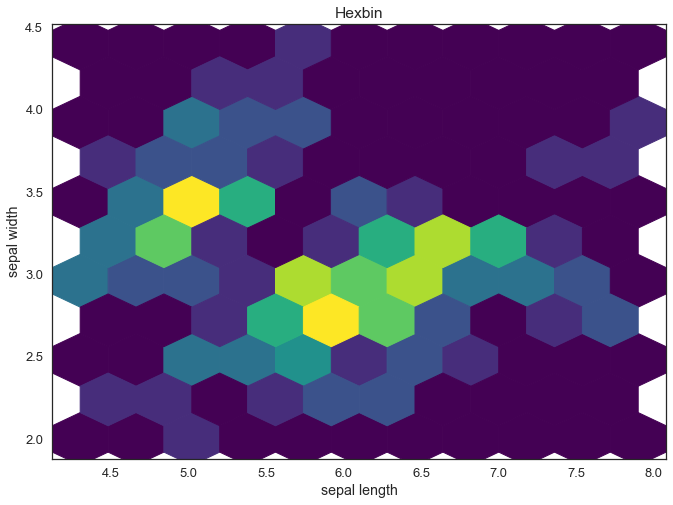

In [88]:
plt.hexbin(iris.sepal_length, iris.sepal_width, gridsize=10, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Hexbin')
plt.show()

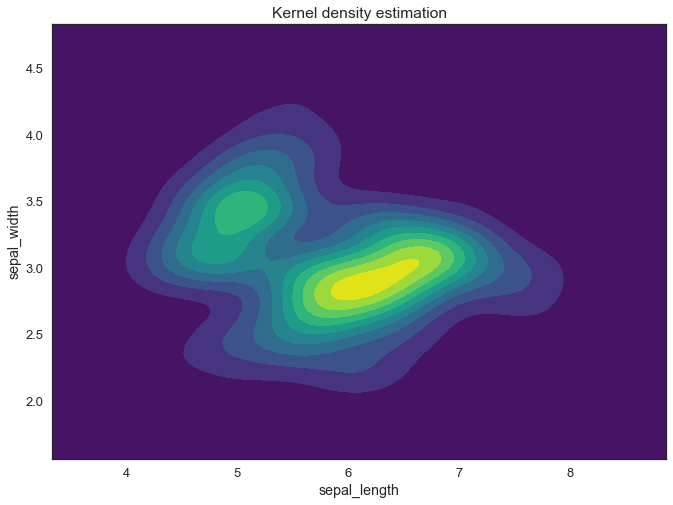

In [96]:
sns.kdeplot(iris.sepal_length, iris.sepal_width, shade=True, cmap='viridis')
plt.title('Kernel density estimation');

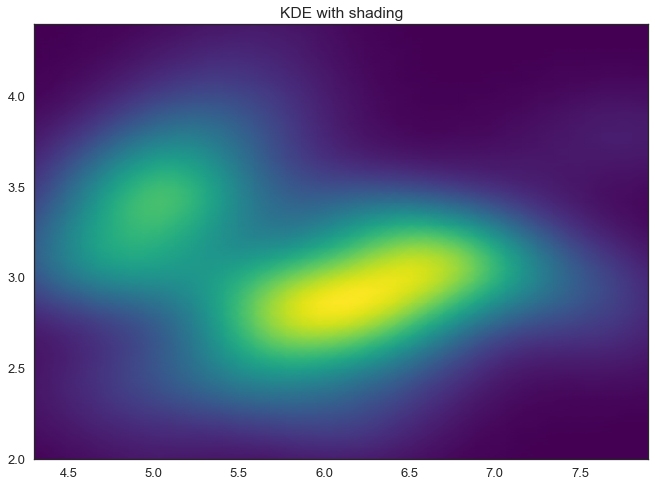

In [95]:
from scipy.stats import kde
nbins=40
data = iris[['sepal_length','sepal_width']].values

#fit the KDE on a grid
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[data[:,0].min():data[:,0].max():nbins*1j, data[:,1].min():data[:,1].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud',cmap='viridis')
plt.title('KDE with shading');